# Project_Zomato

# Predict the future of restaurants Success or not with Zomato in business  

In [47]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#reading the data file
df=pd.read_csv("zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [49]:
df.shape

(51717, 17)

In [50]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [51]:
#chekcing misisng values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [52]:
#Columsn names having Missing values 
feature_na=[]
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na        

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [53]:

df['rate'].isnull().sum()/len(df)*100

15.033741322969234

In [54]:
#overall missing values in the dataset
for feature in feature_na:
    print('{} has {} misisng values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 misisng values
phone has 2.3358 misisng values
location has 0.0406 misisng values
rest_type has 0.4389 misisng values
dish_liked has 54.2916 misisng values
cuisines has 0.087 misisng values
approx_cost(for two people) has 0.669 misisng values


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Cleaning Numerical data

In [56]:
df['approx_cost(for two people)'].dtypes

dtype('O')

In [57]:
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,NaN,0,NaN,JP Nagar,Delivery,NaN,Beverages,NaN,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,NaN,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,-,0,NaN,Bannerghatta Road,Quick Bites,NaN,"North Indian, Chinese, South Indian",NaN,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9/5,237,NaN,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,NaN,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50940,https://www.zomato.com/bangalore/cinnabon-whit...,"Ground Floor, The Forum Neighborhood Mall, Pre...",Cinnabon,No,No,4.0 /5,80,NaN,Whitefield,Quick Bites,"Rolls, Cinnamon Roll, Cinnamon Bun","Beverages, American, Bakery",NaN,"[('Rated 4.0', ""RATED\n Who else is a Cinnabo...",[],Desserts,Whitefield
51233,https://www.zomato.com/bangalore/mayas-kitchen...,"43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...",Mayas kitchen,No,No,NaN,0,NaN,Whitefield,Casual Dining,NaN,"South Indian, Chinese, Chettinad",NaN,"[('Rated 4.0', ""RATED\n Food was pretty good,...",[],Dine-out,Whitefield
51247,https://www.zomato.com/bangalore/mast-kalandar...,"D64, 33, 1st Floor, Sundari Armadale, Next To ...",Mast Kalandar,No,No,2.6 /5,76,NaN,Whitefield,Casual Dining,"Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...",North Indian,NaN,"[('Rated 1.0', 'RATED\n Terrible food in this...",[],Dine-out,Whitefield
51271,https://www.zomato.com/bangalore/karavalli-foo...,"N254-107, 1st Main Road, Near ITPL Gate 3, KIA...",Karavalli Food Court,No,No,3.2 /5,4,NaN,Whitefield,Casual Dining,NaN,South Indian,NaN,"[('Rated 1.0', 'RATED\n i was a regular custo...",[],Dine-out,Whitefield


In [58]:
#checking unique values
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [59]:
#changing the data type 
def remove_comma(x):
    return x.replace(',','')

In [60]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(str).apply(remove_comma)

In [61]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [62]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [63]:
df['approx_cost(for two people)'].dtypes

dtype('float64')

In [64]:
df['rate'].dtype

dtype('O')

In [65]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [66]:
def remove_com(x):
    return x.replace('/5','')

In [67]:
df['rate']=df['rate'].astype(str).apply(remove_com)

In [68]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [69]:
df['rate'].replace('-',0,inplace=True)
df['rate'].replace('NEW',0,inplace=True)

In [70]:
df['rate']=df['rate'].astype(float)

In [71]:
df['rate'].dtypes

dtype('float64')

# Cleaning Catragorical data


In [72]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

<AxesSubplot:>

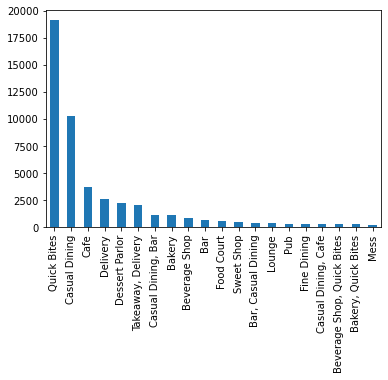

In [73]:
df['rest_type'].value_counts().nlargest(20).plot.bar()

In [74]:
def top_rest(x):
    if x in ('Quick Bites','Casual Dining'):
        return 'Quick Bites+ Casual Dining'
    else:
        return 'others'

In [75]:
df['Top_rest']=df['rest_type'].apply(top_rest)

In [76]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),Top_rest
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Quick Bites+ Casual Dining
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Quick Bites+ Casual Dining
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,others
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Quick Bites+ Casual Dining
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Quick Bites+ Casual Dining


In [77]:
import plotly.express as px

In [78]:
values=df['Top_rest'].value_counts().values
label=df['Top_rest'].value_counts().index
fig=px.pie(df,names=label,values=values)
fig.show()

### Note:-In future "Quick Bites & Casual Dining" ll dominate the market

In [79]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_rest'],
      dtype='object')

In [80]:
 rest=df.groupby('name').agg({'votes':'sum','url':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()

In [81]:
rest.head()

,name,votes,url,approx_cost(for two people),rate
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [82]:
rest.columns=['name','total_votes','total_unitles','average_cost','mean_rating']

In [83]:
rest.head()

,name,total_votes,total_unitles,average_cost,mean_rating
0,#FeelTheROLL,14,2,200.0,3.4
1,#L-81 Cafe,432,9,400.0,3.9
2,#Vibes Restro,0,3,700.0,NaN
3,#refuel,111,3,400.0,3.7
4,'Brahmins' Thatte Idli,0,1,100.0,NaN


In [84]:
rest['votes_per_untiles']=rest['total_votes']/rest['total_unitles']

In [85]:
rest.head()

,name,total_votes,total_unitles,average_cost,mean_rating,votes_per_untiles
0,#FeelTheROLL,14,2,200.0,3.4,7.0
1,#L-81 Cafe,432,9,400.0,3.9,48.0
2,#Vibes Restro,0,3,700.0,NaN,0.0
3,#refuel,111,3,400.0,3.7,37.0
4,'Brahmins' Thatte Idli,0,1,100.0,NaN,0.0


In [86]:
popular=rest.sort_values(by='total_unitles',ascending=False)
popular

,name,total_votes,total_unitles,average_cost,mean_rating,votes_per_untiles
1320,Cafe Coffee Day,3089,96,844.791667,3.147191,32.177083
5549,Onesta,347520,85,600.000000,4.410588,4088.470588
3788,Just Bake,2898,73,400.000000,3.355882,39.698630
2446,Empire Restaurant,229808,71,685.211268,3.916901,3236.732394
2577,Five Star Chicken,3134,70,257.857143,3.425000,44.771429
...,...,...,...,...,...,...
1900,Cool Break,11,1,150.000000,3.400000,11.000000
8076,The Shake Factory Originals,8,1,200.000000,3.300000,8.000000
5216,Nethravathi Military Hotel,0,1,200.000000,NaN,0.000000
7426,Swadisht North Indian Restaurant,23,1,200.000000,3.200000,23.000000


In [87]:
popular.shape

(8792, 6)

<AxesSubplot:xlabel='total_votes', ylabel='name'>

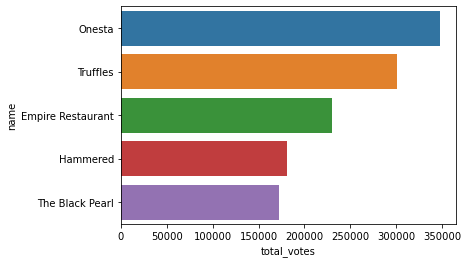

In [91]:
#checking top retsurant list
sns.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending=False).query('total_votes>0').head(5))

<AxesSubplot:xlabel='total_votes', ylabel='name'>

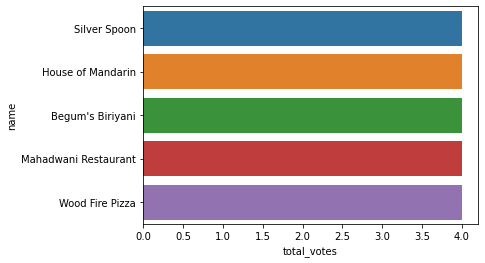

In [93]:
#checking lowest resturant list
sns.barplot(x='total_votes',y='name',data=popular.sort_values(by='total_votes',ascending=False).query('total_votes>0').tail(5))

<AxesSubplot:xlabel='average_cost', ylabel='name'>

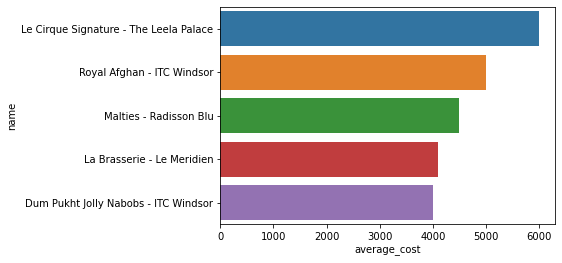

In [94]:
#checking most expensive returant
sns.barplot(x='average_cost',y='name',data=popular.sort_values(by='average_cost',ascending=False).query('average_cost>0').head(5))

<AxesSubplot:xlabel='average_cost', ylabel='name'>

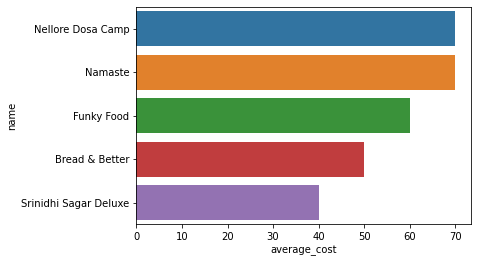

In [95]:
#checking most cheap  resturants
sns.barplot(x='average_cost',y='name',data=popular.sort_values(by='average_cost',ascending=False).query('average_cost>0').tail(5))

In [98]:
#chekcing booking and not booling from resturant
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

#### Note:-from above we can say that only '6449' restaurant provides booking and rest are not provide booking table.

In [100]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

### Note:-Nearly '30444' restaurant provides online-order services